In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

import concave_enclosed_csf_list
import csf_list
import _image_processing
import _image_curve
import enclosed_csf_list
import _metrics
import _refresher_classes

In [2]:
from pathlib import Path

In [23]:
import importlib
importlib.reload(concave_enclosed_csf_list)
importlib.reload(enclosed_csf_list)

<module 'enclosed_csf_list' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\enclosed_csf_list.py'>

In [4]:
sil_path = r"C:\Users\ghage\PycharmProjects\enclosedcurveshorteningflow\lib\silhouettes\geographic"

In [5]:
sil_files = os.listdir(sil_path)

In [6]:
images = [_image_processing.load_image(os.path.join(sil_path, file)) for file in sil_files 
          if os.path.isfile(os.path.join(sil_path, file))]

In [7]:
open_images = [_image_processing.open_image(image, 5) for image in images]

In [8]:
image_curves = [_image_curve.ImageCurve(image).curve() for image in open_images]

In [9]:
Path(os.path.join(sil_path, "image_curves/")).mkdir(parents=True, exist_ok=True)
with open(os.path.join(sil_path, "image_curves/image_curve.pickle"), 'wb') as f:
    pickle.dump(image_curves, f)

In [10]:
len(image_curves)

15

In [11]:
ecsf = concave_enclosed_csf_list.ConcaveEnclosedCSFList(image_curves[0], step_size=0.05, refresh_interval=500)

In [12]:
ecsf.run()

Iteration: 0, Concavity:  1449.90, Length to original %:  100.00
Iteration: 500, Concavity:  22.61, Length to original %:  78.12
Iteration: 1000, Concavity:  14.44, Length to original %:  73.52
Iteration: 1500, Concavity:  10.71, Length to original %:  70.44
Iteration: 2000, Concavity:  8.70, Length to original %:  68.09
Iteration: 2500, Concavity:  7.55, Length to original %:  66.10
Iteration: 3000, Concavity:  6.77, Length to original %:  64.28
Iteration: 3500, Concavity:  6.23, Length to original %:  62.48
Iteration: 4000, Concavity:  8.07, Length to original %:  59.14
Iteration: 4500, Concavity:  8.10, Length to original %:  55.95
Iteration: 5000, Concavity:  2.84, Length to original %:  54.38
Iteration: 5500, Concavity:  1.95, Length to original %:  53.22
Iteration: 6000, Concavity:  1.26, Length to original %:  51.98
Iteration: 6500, Concavity:  0.78, Length to original %:  50.76
Iteration: 7000, Concavity:  0.50, Length to original %:  49.63
Iteration: 7500, Concavity:  0.30, Le

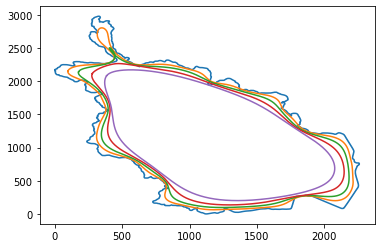

In [13]:
_ = [plt.plot(*curve.transpose()) for curve in ecsf.curves[::20]]

In [14]:
_metrics.enclosed_area(ecsf.curves[0]), _metrics.enclosed_area(ecsf.curves[-1])

(3257736.5, 2144394.6283760704)

In [15]:
csf = csf_list.CSFList(ecsf.curves[-1])

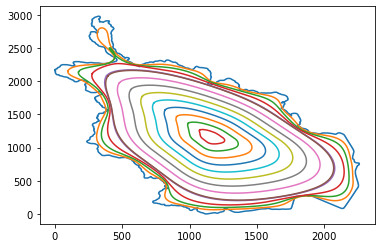

In [16]:
_ = [plt.plot(*curve.transpose()) for curve in ecsf.curves[::20]]
_ = [plt.plot(*curve.transpose()) for curve in csf.linspace_subsets_resample(10)]

In [17]:
cecsf = ecsf

In [20]:
ecsf = enclosed_csf_list.enclosed_csf_list(image_curves[0], 10, step_size=0.05)

Iteration: 0, Concavity:  1449.90, Length to original %:  100.00
Iteration: 100, Concavity:  54.95, Length to original %:  85.90
Iteration: 200, Concavity:  37.70, Length to original %:  82.84
Iteration: 300, Concavity:  30.29, Length to original %:  80.87
Iteration: 400, Concavity:  25.82, Length to original %:  79.37
Iteration: 500, Concavity:  22.61, Length to original %:  78.12
Iteration: 600, Concavity:  20.21, Length to original %:  77.02
Iteration: 700, Concavity:  18.35, Length to original %:  76.03
Iteration: 800, Concavity:  16.82, Length to original %:  75.12
Iteration: 900, Concavity:  15.54, Length to original %:  74.28
Iteration: 1000, Concavity:  14.44, Length to original %:  73.52
Iteration: 1100, Concavity:  13.50, Length to original %:  72.81
Iteration: 1200, Concavity:  12.67, Length to original %:  72.16
Iteration: 1300, Concavity:  11.93, Length to original %:  71.55
Iteration: 1400, Concavity:  11.28, Length to original %:  70.98
Iteration: 1500, Concavity:  10.71

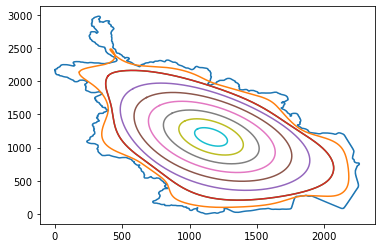

In [22]:
_ = [plt.plot(*c.transpose()) for c in ecsf]

In [24]:
ecsf_usa = enclosed_csf_list.enclosed_csf_list(image_curves[-1], 10, step_size=0.1)

Iteration: 0, Concavity:  1943.73, Length to original %:  100.00
Iteration: 100, Concavity:  53.10, Length to original %:  82.02
Iteration: 200, Concavity:  36.78, Length to original %:  78.25
Iteration: 300, Concavity:  29.24, Length to original %:  75.62
Iteration: 400, Concavity:  24.03, Length to original %:  73.61
Iteration: 500, Concavity:  20.69, Length to original %:  72.05
Iteration: 600, Concavity:  18.51, Length to original %:  70.76
Iteration: 700, Concavity:  16.89, Length to original %:  69.63
Iteration: 800, Concavity:  15.56, Length to original %:  68.58
Iteration: 900, Concavity:  14.38, Length to original %:  67.56
Iteration: 1000, Concavity:  13.31, Length to original %:  66.53
Iteration: 1100, Concavity:  12.29, Length to original %:  65.47
Iteration: 1200, Concavity:  11.37, Length to original %:  64.43
Iteration: 1300, Concavity:  10.64, Length to original %:  63.48
Iteration: 1400, Concavity:  10.02, Length to original %:  62.59
Iteration: 1500, Concavity:  9.47,

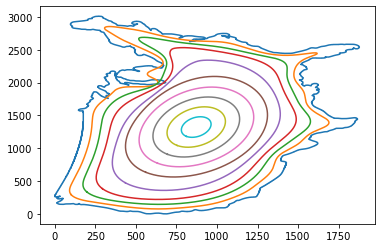

In [25]:
_ = [plt.plot(*c.transpose()) for c in ecsf_usa]

In [28]:
ecsf_louis = enclosed_csf_list.enclosed_csf_list(image_curves[10], 100, step_size=0.2)

Iteration: 0, Concavity:  1907.54, Length to original %:  100.00
Iteration: 100, Concavity:  60.99, Length to original %:  78.39
Iteration: 200, Concavity:  36.82, Length to original %:  72.77
Iteration: 300, Concavity:  23.78, Length to original %:  69.19
Iteration: 400, Concavity:  19.60, Length to original %:  67.02
Iteration: 500, Concavity:  17.80, Length to original %:  65.52
Iteration: 600, Concavity:  16.88, Length to original %:  64.20
Iteration: 700, Concavity:  15.37, Length to original %:  62.91
Iteration: 800, Concavity:  13.23, Length to original %:  61.31
Iteration: 900, Concavity:  11.46, Length to original %:  59.73
Iteration: 1000, Concavity:  10.36, Length to original %:  58.48
Iteration: 1100, Concavity:  9.59, Length to original %:  57.42
Iteration: 1200, Concavity:  9.11, Length to original %:  56.47
Iteration: 1300, Concavity:  11.06, Length to original %:  55.03
Iteration: 1400, Concavity:  9.75, Length to original %:  53.77
Iteration: 1500, Concavity:  8.59, Le

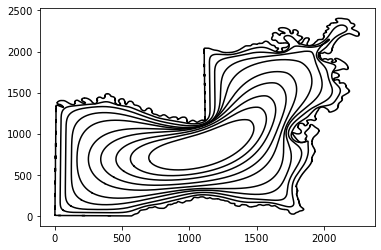

In [35]:
_ = [plt.plot(*c.transpose(), c=(i/len(ecsf_louis)/10, )*3) for i, c in enumerate(ecsf_louis[::10])]